In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [19]:
df_geo = pd.read_csv('geo_data.txt', sep='\t', header=None,
                     names=['lat', 'lon'])/10000
df_geo.head()

,lat,lon
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437


In [20]:
import mpl_toolkits.basemap as bm

def plot_geo(lat, lon, labels=None):
    try:
        lllat, lllon = lat.min()-1, lon.max()+1
        urlat, urlon = lat.max()+1, lon.min()-1

        plt.figure(figsize=(10, 10))

        m = bm.Basemap(
            llcrnrlon=lllon,
            llcrnrlat=lllat,
            urcrnrlon=urlon,
            urcrnrlat=urlat, 
            projection='merc',
            resolution='h'
        )

        m.drawcoastlines(linewidth=0.5)
        m.drawmapboundary(fill_color='#47A4C9', zorder=1)
        m.fillcontinents(color='#EBC4D8',lake_color='#47A4C9', zorder=2)

        parallels = np.linspace(lllat, urlat, 10)
        m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
        # draw meridians
        meridians = np.linspace(urlon, lllon, 10)
        m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

        m.scatter(lon, lat, latlon=True, cmap=plt.cm.jet,
              zorder=3, lw=0, c=labels)
    except:
        print('что-то пошло не так')
        plt.scatter(x=lon, y=lat, c=labels, cmap=plt.cm.jet)
        plt.axis('equal')

что-то пошло не так


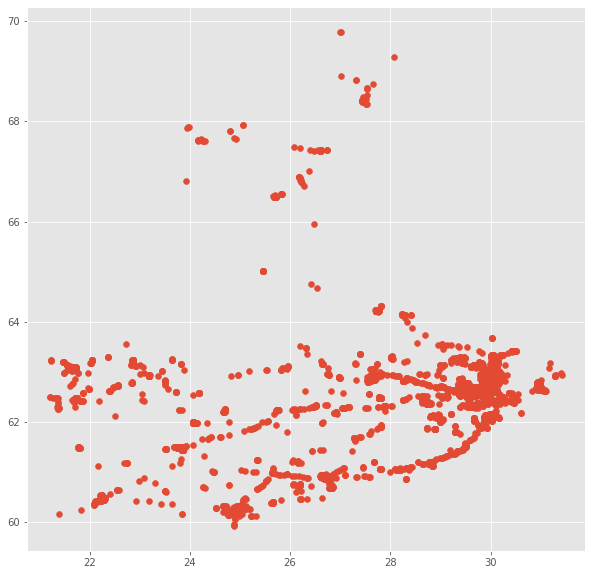

In [21]:
plot_geo(df_geo.lat.values, df_geo.lon.values)

In [22]:
km_in_radian = 6371.0088

In [23]:
from sklearn.neighbors import NearestNeighbors

In [24]:
X = df_geo.values
X = np.radians(X)

In [26]:
model = NearestNeighbors(n_neighbors=20, algorithm='ball_tree', metric='haversine')
model.fit(X)

NearestNeighbors(algorithm='ball_tree', metric='haversine', n_neighbors=20)

In [30]:
dist, _ = model.kneighbors(X, n_neighbors=20, return_distance=True)

In [31]:
dist.shape

(13467, 20)

In [32]:
dist = dist[:, -1]

In [33]:
dist = np.sort(dist)

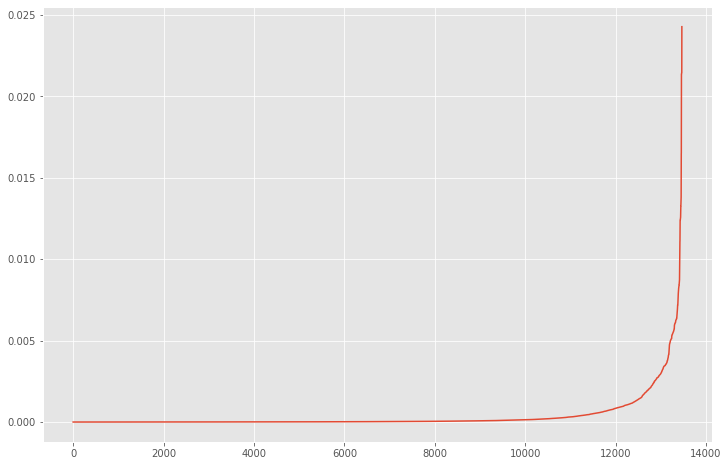

In [34]:
plt.plot(dist);

In [67]:
eps = 0.003

In [68]:
from sklearn.cluster import DBSCAN

In [69]:
dbscan = DBSCAN(eps=eps, min_samples=20, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.003, metric='haversine', min_samples=20)

In [70]:
labels = dbscan.labels_

In [71]:
pd.Series(labels).value_counts()

 0     11215
 7       357
 3       337
-1       311
 1       250
 5       182
 2       164
 6       160
 10      118
 8        93
 15       66
 14       37
 11       27
 12       26
 9        25
 18       24
 16       24
 13       22
 4        21
 17        8
dtype: int64

что-то пошло не так


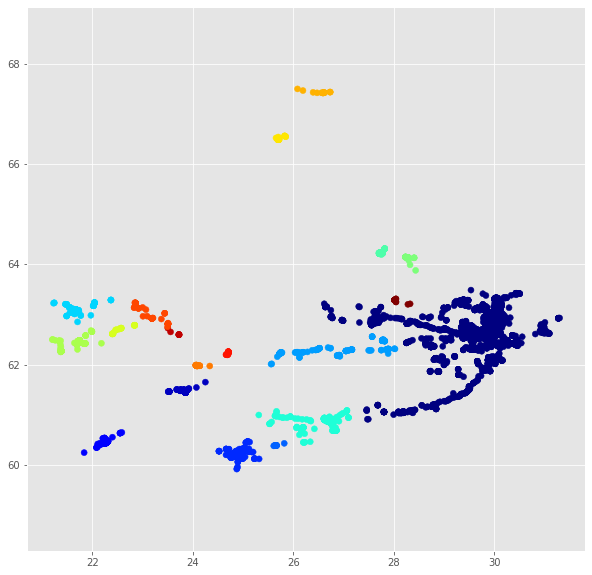

In [72]:
idx = labels != -1
plot_geo(df_geo.loc[idx, 'lat'].values, 
         df_geo.loc[idx, 'lon'].values,
         labels=labels[idx])